# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from api_keys import weather_api_key
from citipy import citipy

# csv
output_data_file = "../output_data/cities.csv"

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count
len(cities)

631

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# query url
base_url = "http://api.openweathermap.org/data/2.5/weather?"

query_url = f"{base_url}appid={weather_api_key}&units=imperial&q="

# empty lists to store data
city_name =[] 
latitude = []
longitude = []
max_temperature = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

count_record = 0
count_set = 1

print("Beginning Data Retrieval")
print("------------------------")

# loop through cities and request data
for city in cities:
    if count_record > 49: 
        count_set += 1
        count_record = 0
    try:
        response = requests.get(query_url + city).json()
        city_name.append(response['name'])
        latitude.append(response['coord']['lat'])
        longitude.append(response['coord']['lon'])
        max_temperature.append(response['main']['temp'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        
        print(f"Processing Record {count_record} of Set {count_set} | {city}")
        count_record += 1
        
    except:
        print(f"City not found. Skipping... ")
        
print("------------------------")
print("Data Retrieval Complete ")
print("------------------------")    

# put data in dataframe
cities_df = pd.DataFrame({'City' : city_name,
                          'Lat' : latitude,
                          'Lng' : longitude,
                          'Max Temp' : max_temperature,
                          'Humidity' : humidity,
                          'Cloudiness' : cloudiness,
                          'Wind Speed' : wind_speed,
                          'Country' : country,
                          'Date' : date})

Beginning Data Retrieval
------------------------
Processing Record 0 of Set 1 | great bend
Processing Record 1 of Set 1 | albany
Processing Record 2 of Set 1 | labuhan
Processing Record 3 of Set 1 | barrow
Processing Record 4 of Set 1 | sengiley
Processing Record 5 of Set 1 | busselton
Processing Record 6 of Set 1 | qaanaaq
Processing Record 7 of Set 1 | mahebourg
Processing Record 8 of Set 1 | cape town
Processing Record 9 of Set 1 | barra do corda
Processing Record 10 of Set 1 | ilhabela
Processing Record 11 of Set 1 | galveston
Processing Record 12 of Set 1 | talnakh
Processing Record 13 of Set 1 | iberia
Processing Record 14 of Set 1 | mount gambier
City not found. Skipping... 
Processing Record 15 of Set 1 | georgetown
Processing Record 16 of Set 1 | carnarvon
Processing Record 17 of Set 1 | mataura
Processing Record 18 of Set 1 | bluff
Processing Record 19 of Set 1 | lazaro cardenas
City not found. Skipping... 
Processing Record 20 of Set 1 | puerto baquerizo moreno
City not fou

Processing Record 33 of Set 4 | berdigestyakh
Processing Record 34 of Set 4 | harper
Processing Record 35 of Set 4 | port blair
Processing Record 36 of Set 4 | lasa
Processing Record 37 of Set 4 | port-gentil
Processing Record 38 of Set 4 | marawi
Processing Record 39 of Set 4 | bethel
Processing Record 40 of Set 4 | baherden
Processing Record 41 of Set 4 | itarema
Processing Record 42 of Set 4 | brae
Processing Record 43 of Set 4 | vredendal
Processing Record 44 of Set 4 | semnan
City not found. Skipping... 
Processing Record 45 of Set 4 | aripuana
Processing Record 46 of Set 4 | geraldton
Processing Record 47 of Set 4 | san luis
Processing Record 48 of Set 4 | santa maria
Processing Record 49 of Set 4 | urdoma
Processing Record 0 of Set 5 | jalu
Processing Record 1 of Set 5 | vestmannaeyjar
Processing Record 2 of Set 5 | kalundborg
Processing Record 3 of Set 5 | mareeba
Processing Record 4 of Set 5 | srednekolymsk
Processing Record 5 of Set 5 | cayenne
Processing Record 6 of Set 5 | 

City not found. Skipping... 
Processing Record 27 of Set 8 | ihosy
Processing Record 28 of Set 8 | seminole
Processing Record 29 of Set 8 | maumere
Processing Record 30 of Set 8 | shieli
Processing Record 31 of Set 8 | vardo
Processing Record 32 of Set 8 | severo-kurilsk
Processing Record 33 of Set 8 | pangai
Processing Record 34 of Set 8 | chara
Processing Record 35 of Set 8 | nyurba
Processing Record 36 of Set 8 | yelyzavethradka
Processing Record 37 of Set 8 | voh
Processing Record 38 of Set 8 | fortuna
Processing Record 39 of Set 8 | uusikaupunki
Processing Record 40 of Set 8 | hualmay
Processing Record 41 of Set 8 | khani
Processing Record 42 of Set 8 | davila
Processing Record 43 of Set 8 | nizwa
Processing Record 44 of Set 8 | tamboril
Processing Record 45 of Set 8 | gamba
Processing Record 46 of Set 8 | stanislav
Processing Record 47 of Set 8 | aleksandrov gay
Processing Record 48 of Set 8 | swift current
Processing Record 49 of Set 8 | cacador
Processing Record 0 of Set 9 | ak

Processing Record 16 of Set 12 | pangody
Processing Record 17 of Set 12 | rongcheng
Processing Record 18 of Set 12 | lusambo
City not found. Skipping... 
City not found. Skipping... 
Processing Record 19 of Set 12 | ngong
City not found. Skipping... 
Processing Record 20 of Set 12 | omboue
Processing Record 21 of Set 12 | ola
City not found. Skipping... 
Processing Record 22 of Set 12 | axim
Processing Record 23 of Set 12 | nguruka
Processing Record 24 of Set 12 | port moresby
Processing Record 25 of Set 12 | saint-augustin
Processing Record 26 of Set 12 | sorland
Processing Record 27 of Set 12 | velikodvorskiy
Processing Record 28 of Set 12 | mbaiki
Processing Record 29 of Set 12 | tomatlan
Processing Record 30 of Set 12 | dukat
------------------------
Data Retrieval Complete 
------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
cities_df.to_csv(output_data_file)
cities_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Great Bend,38.36,-98.76,75.51,49,1,16.11,US,1598897680
1,Albany,42.60,-73.97,72.75,48,75,4.92,US,1598897166
2,Labuhan,-6.88,112.21,77.07,80,41,8.16,ID,1598897606
3,Barrow,71.29,-156.79,37.40,86,90,21.92,US,1598897062
4,Sengiley,53.96,48.79,69.80,64,0,4.47,RU,1598897680


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
cities_df["Humidity"].max()

# There is no Humidity over 100, so all of this is not necessary

100

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

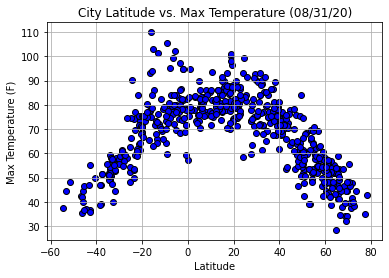

In [16]:
# put axes
lat = cities_df["Lat"]
max_temp = cities_df["Max Temp"]

# plot
plt.scatter(lat, max_temp, marker="o", facecolors="blue", edgecolors="black")
plt.title("City Latitude vs. Max Temperature (08/31/20)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid()

# save
plt.savefig("CityLatitudeVsMaxTemperature.png")

# show plot
plt.show()

## Latitude vs. Humidity Plot

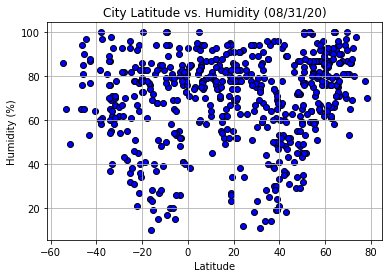

In [17]:
# put axes
humid = cities_df["Humidity"]

# plot
plt.scatter(lat, humid, marker="o", facecolors="blue", edgecolors="black")
plt.title("City Latitude vs. Humidity (08/31/20)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid()

# save
plt.savefig("CityLatitudeVsHumidity.png")

# show plot
plt.show()

## Latitude vs. Cloudiness Plot

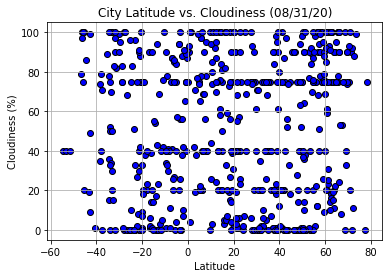

In [18]:
# put axes
cloud = cities_df["Cloudiness"]

# plot
plt.scatter(lat, cloud, marker="o", facecolors="blue", edgecolors="black")
plt.title("City Latitude vs. Cloudiness (08/31/20)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid()

# save
plt.savefig("CityLatitudeVsCloudiness.png")

# show plot
plt.show()

## Latitude vs. Wind Speed Plot

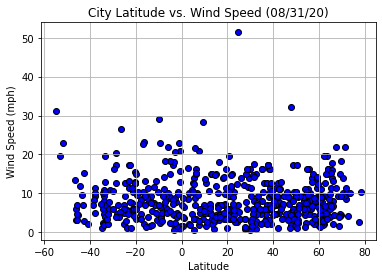

In [19]:
# put axes
wind = cities_df["Wind Speed"]

# plot
plt.scatter(lat, wind, marker="o", facecolors="blue", edgecolors="black")
plt.title("City Latitude vs. Wind Speed (08/31/20)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid()

# save
plt.savefig("CityLatitudeVsWindSpeed.png")

# show plot
plt.show()

## Linear Regression

In [20]:
# create new df's for northern and southern hempishere
north_hem_df = cities_df[cities_df['Lat'] > 0]
south_hem_df = cities_df[cities_df['Lat'] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

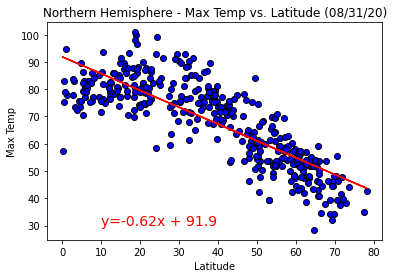

The r-squared is: 0.6798167723256224


<Figure size 432x288 with 0 Axes>

In [30]:
from scipy.stats import linregress

x_value = north_hem_df['Lat']
y_value = north_hem_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr)= linregress(x_value, y_value)
regress_values= x_value *slope + intercept
line_eq=f"y={round(slope,2)}x + {round(intercept,2)}"
plt.scatter(x_value, y_value, marker="o", facecolors="blue", edgecolors="black")
plt.plot(x_value, regress_values, color='red')
plt.annotate(line_eq, (10, 30), color='red', fontsize= 14)
plt.title("Northern Hemisphere - Max Temp vs. Latitude (08/31/20)")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.show()
plt.savefig("NorthMaxTempVsLat.png")
print(f"The r-squared is: {rvalue**2}")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

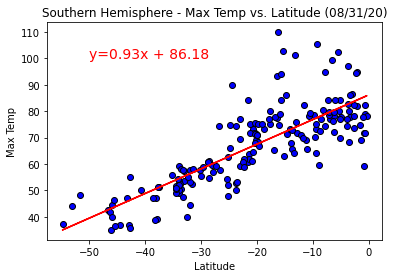

The r-squared is: 0.6411560911145


<Figure size 432x288 with 0 Axes>

In [32]:
x_value = south_hem_df['Lat']
y_value = south_hem_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr)= linregress(x_value, y_value)
regress_values= x_value *slope + intercept
line_eq=f"y={round(slope,2)}x + {round(intercept,2)}"
plt.scatter(x_value, y_value, marker="o", facecolors="blue", edgecolors="black")
plt.plot(x_value, regress_values, color='red')
plt.annotate(line_eq, (-50, 100), color='red', fontsize= 14)
plt.title("Southern Hemisphere - Max Temp vs. Latitude (08/31/20)")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.show()
plt.savefig("SouthMaxTempVsLat.png")
print(f"The r-squared is: {rvalue**2}")

In [34]:
#Conclusion 1

print("Conclusion 1: The highest maximum temperatures are near the 0 value of the Latitude")

Conclusion 1: The highest maximum temperatures are near the 0 value of the Latitude


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

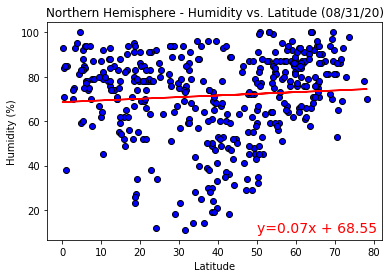

The r-squared is: 0.0060953970021456385


<Figure size 432x288 with 0 Axes>

In [36]:
x_value = north_hem_df['Lat']
y_value = north_hem_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr)= linregress(x_value, y_value)
regress_values= x_value *slope + intercept
line_eq=f"y={round(slope,2)}x + {round(intercept,2)}"
plt.scatter(x_value, y_value, marker="o", facecolors="blue", edgecolors="black")
plt.plot(x_value, regress_values, color='red')
plt.annotate(line_eq, (50, 10), color='red', fontsize= 14)
plt.title("Northern Hemisphere - Humidity vs. Latitude (08/31/20)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.show()
plt.savefig("NorthHumVsLat.png")
print(f"The r-squared is: {rvalue**2}")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

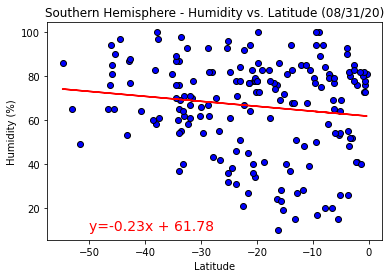

The r-squared is: 0.019566938848006556


<Figure size 432x288 with 0 Axes>

In [38]:
x_value = south_hem_df['Lat']
y_value = south_hem_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr)= linregress(x_value, y_value)
regress_values= x_value *slope + intercept
line_eq=f"y={round(slope,2)}x + {round(intercept,2)}"
plt.scatter(x_value, y_value, marker="o", facecolors="blue", edgecolors="black")
plt.plot(x_value, regress_values, color='red')
plt.annotate(line_eq, (-50, 10), color='red', fontsize= 14)
plt.title("Southern Hemisphere - Humidity vs. Latitude (08/31/20)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.show()
plt.savefig("SouthHumVsLat.png")
print(f"The r-squared is: {rvalue**2}")

In [39]:
#Conclusion 2

print("Conclusion 2: Humidity and Latitude are not correlated")

Conclusion 2: Humidity and Latitude are not correlated


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

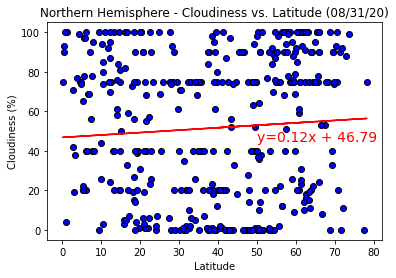

The r-squared is: 0.004715854055267486


<Figure size 432x288 with 0 Axes>

In [43]:
x_value = north_hem_df['Lat']
y_value = north_hem_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr)= linregress(x_value, y_value)
regress_values= x_value *slope + intercept
line_eq=f"y={round(slope,2)}x + {round(intercept,2)}"
plt.scatter(x_value, y_value, marker="o", facecolors="blue", edgecolors="black")
plt.plot(x_value, regress_values, color='red')
plt.annotate(line_eq, (50, 45), color='red', fontsize= 14)
plt.title("Northern Hemisphere - Cloudiness vs. Latitude (08/31/20)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.show()
plt.savefig("NorthCloudVsLat.png")
print(f"The r-squared is: {rvalue**2}")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

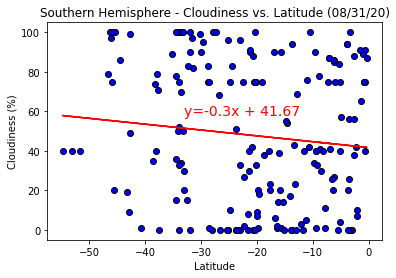

The r-squared is: 0.012140477410952802


<Figure size 432x288 with 0 Axes>

In [47]:
x_value = south_hem_df['Lat']
y_value = south_hem_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr)= linregress(x_value, y_value)
regress_values= x_value *slope + intercept
line_eq=f"y={round(slope,2)}x + {round(intercept,2)}"
plt.scatter(x_value, y_value, marker="o", facecolors="blue", edgecolors="black")
plt.plot(x_value, regress_values, color='red')
plt.annotate(line_eq, (-33, 58), color='red', fontsize= 14)
plt.title("Southern Hemisphere - Cloudiness vs. Latitude (08/31/20)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.show()
plt.savefig("SouthCloudVsLat.png")
print(f"The r-squared is: {rvalue**2}")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

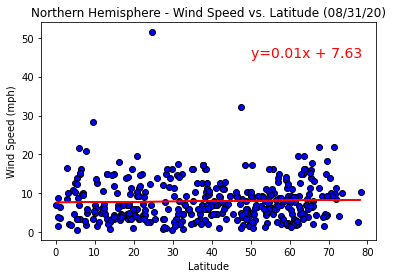

The r-squared is: 0.0011127216502160248


<Figure size 432x288 with 0 Axes>

In [54]:
x_value = north_hem_df['Lat']
y_value = north_hem_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr)= linregress(x_value, y_value)
regress_values= x_value *slope + intercept
line_eq=f"y={round(slope,2)}x + {round(intercept,2)}"
plt.scatter(x_value, y_value, marker="o", facecolors="blue", edgecolors="black")
plt.plot(x_value, regress_values, color='red')
plt.annotate(line_eq, (50, 45), color='red', fontsize= 14)
plt.title("Northern Hemisphere - Wind Speed vs. Latitude (08/31/20)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.show()
plt.savefig("NorthWindVsLat.png")
print(f"The r-squared is: {rvalue**2}")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

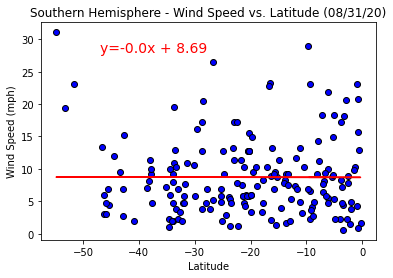

The r-squared is: 2.4920131572969556e-06


<Figure size 432x288 with 0 Axes>

In [57]:
x_value = south_hem_df['Lat']
y_value = south_hem_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr)= linregress(x_value, y_value)
regress_values= x_value *slope + intercept
line_eq=f"y={round(slope,2)}x + {round(intercept,2)}"
plt.scatter(x_value, y_value, marker="o", facecolors="blue", edgecolors="black")
plt.plot(x_value, regress_values, color='red')
plt.annotate(line_eq, (-47, 28), color='red', fontsize= 14)
plt.title("Southern Hemisphere - Wind Speed vs. Latitude (08/31/20)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.show()
plt.savefig("SouthWindVsLat.png")
print(f"The r-squared is: {rvalue**2}")

In [58]:
#Conclusion 3

print("Conclusion 3: There is no trend in the Wind Speed compared to the latitude")

Conclusion 3: There is no trend in the Wind Speed compared to the latitude
